In [1]:
#load pandas
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
traffic_counts = pd.read_csv("https://data.wprdc.org/datastore/dump/6dfd4f8f-cbf5-4917-a5eb-fd07f4403167")

traffic_counts.head()

,id,device_id,record_oid,count_start_date,count_end_date,average_daily_car_traffic,average_daily_bike_traffic,counter_number,counter_type,speed_limit,...,longitude,latitude,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone
0,1011743669,85,1.445865e+09,2019-04-18,2019-04-26,4949.0,NaN,6,StatTrak,25.0,...,-79.967772,40.455733,Polish Hill,7.0,6.0,42003060500,6.0,6.0,2.0,2-6
1,1026101993,140,1.121444e+09,2019-01-24,NaN,NaN,NaN,NaN,Intersection Study,NaN,...,-79.952249,40.466157,Central Lawrenceville,7.0,9.0,42003090200,2.0,9.0,2.0,3-6
2,1032382575,11,1.539893e+09,2018-08-28,2018-09-04,NaN,NaN,NaN,NaN,35.0,...,-80.076469,40.460717,Windgap,2.0,28.0,42003563000,5.0,28.0,6.0,1-16
3,103627606,9,7.341951e+08,2018-07-17,2018-08-01,2741.0,NaN,NaN,StatTrak,25.0,...,-79.914335,40.437379,Squirrel Hill South,5.0,14.0,42003140800,3.0,14.0,4.0,2-18
4,1039546167,144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-80.019211,40.490794,Perry North,1.0,26.0,42003260200,1.0,26.0,1.0,1-15


In [3]:
#create polish hill query mask
polish_hill_qm = traffic_counts["neighborhood"] == "Polish Hill"
polish_hill_qm.head()



0     True
1    False
2    False
3    False
4    False
Name: neighborhood, dtype: bool

In [4]:
#create polish hill subset
polish_hill = traffic_counts[polish_hill_qm]
polish_hill.head(25)

,id,device_id,record_oid,count_start_date,count_end_date,average_daily_car_traffic,average_daily_bike_traffic,counter_number,counter_type,speed_limit,...,longitude,latitude,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone
0,1011743669,85,1.445865e+09,2019-04-18,2019-04-26,4949.0,NaN,6,StatTrak,25.0,...,-79.967772,40.455733,Polish Hill,7.0,6.0,42003060500,6.0,6.0,2.0,2-6
7,1053645660,87,8.042089e+08,2019-04-18,2019-04-26,3015.0,NaN,4,StatTrak,25.0,...,-79.964592,40.457119,Polish Hill,7.0,6.0,42003060500,6.0,6.0,2.0,2-6
79,1858604360,43,1.603853e+09,2018-12-04,2018-12-08,768.0,NaN,2,StatTrak,25.0,...,-79.961140,40.458735,Polish Hill,7.0,6.0,42003060500,6.0,6.0,2.0,2-6
102,2010535291,32,3.492315e+08,2019-10-21,2019-10-29,1049.0,NaN,1,StatTrak,25.0,...,-79.958934,40.459861,Polish Hill,7.0,6.0,42003060500,6.0,6.0,2.0,2-6
173,742086325,86,1.760887e+09,2019-04-18,2019-04-26,5663.0,NaN,1,StatTrak,25.0,...,-79.964110,40.458181,Polish Hill,7.0,6.0,42003060500,6.0,6.0,2.0,2-6
248,1322907977,266,2.037370e+09,2020-09-29,2020-10-07,450.0,NaN,#4,StatTrak,25.0,...,-79.961813,40.456670,Polish Hill,7.0,6.0,42003060500,3.0,6.0,2.0,2-24


In [5]:
polish_hill_car_mean = polish_hill["average_daily_car_traffic"].mean( skipna = True)
print(polish_hill_car_mean)

polish_hill_bike_mean = polish_hill["average_daily_bike_traffic"].mean( skipna = True)
#if(polish_hill_bike_mean is Nan):
polish_hill_bike_mean = 0

print(polish_hill_bike_mean)

polish_hill_mean = polish_hill_car_mean + polish_hill_bike_mean
print(polish_hill_mean)

2649.0
0
2649.0


* for loop
* make array of neighborhood names
* iterate through array
* if value same as array value, add to sum and increment counter



In [6]:
neighborhoods = traffic_counts["neighborhood"].unique()
print(neighborhoods)

['Polish Hill' 'Central Lawrenceville' 'Windgap' 'Squirrel Hill South'
 'Perry North' 'Central Northside' 'Squirrel Hill North' 'Central Oakland'
 'East Liberty' 'Greenfield' 'Bluff' 'Crafton Heights' 'Shadyside'
 'Upper Lawrenceville' 'Highland Park' 'North Shore' 'Mount Washington'
 'Brookline' 'South Shore' 'South Side Flats' 'Bloomfield' 'Larimer'
 'Friendship' 'South Oakland' 'Point Breeze' 'Westwood' 'Regent Square'
 'Knoxville' 'Strip District' 'West Oakland' 'Beechview'
 'South Side Slopes' 'Upper Hill' 'North Oakland' 'Stanton Heights'
 'Manchester' 'Morningside' 'Hazelwood' 'Lower Lawrenceville' 'Overbrook'
 'East Hills' 'Duquesne Heights' 'Lincoln-Lemington-Belmar' 'Sheraden'
 'Elliott' 'Central Business District' 'St. Clair' 'Perry South' 'Carrick'
 'Allegheny Center' 'East Allegheny' 'Chateau' 'Swisshelm Park'
 'Allegheny West' 'Marshall-Shadeland' 'Arlington' 'Homewood North'
 'Homewood South' 'Point Breeze North' 'California-Kirkbride'
 'Beltzhoover' 'Brighton Heights' '

In [7]:
i = 0

for neighborhood in neighborhoods:  
    i += 1
    
print(i)
    
    
    

75


In [8]:

#traffic_counts.fillna(0)
traffic_counts.groupby("neighborhood").count()
better = traffic_counts.groupby("neighborhood").count()["average_daily_bike_traffic"]  > 0
#bet = traffic_counts[better]

#bet.head()

In [9]:
traffic_counts.groupby("neighborhood").count()
better = traffic_counts.groupby("neighborhood").count()
better.fillna(0)

,id,device_id,record_oid,count_start_date,count_end_date,average_daily_car_traffic,average_daily_bike_traffic,counter_number,counter_type,speed_limit,...,speed95_percent,longitude,latitude,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone
neighborhood,,,,,,,,,,,,,,,,,,,,,
Allegheny Center,1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Allegheny West,1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Arlington,3,3,3,3,3,2,0,3,3,2,...,2,3,3,3,3,3,3,3,3,3
Banksville,1,1,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,1
Beechview,4,4,3,3,3,3,0,3,3,3,...,3,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Upper Hill,4,4,4,4,3,3,0,3,4,4,...,3,4,4,4,4,4,4,4,4,4
Upper Lawrenceville,1,1,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,1
West Oakland,2,2,1,1,1,1,0,1,1,1,...,1,2,2,2,2,2,2,2,2,2


In [10]:
#traffic_counts.groupby("neighborhood").count()
better = traffic_counts.groupby("neighborhood").mean()
traffic = better.fillna(0)
traffic = traffic.loc[:, ["average_daily_car_traffic", "average_daily_bike_traffic"]]

In [11]:
traffic["average_daily_traffic"] = traffic["average_daily_car_traffic"]+ traffic["average_daily_bike_traffic"]
traffic

,average_daily_car_traffic,average_daily_bike_traffic,average_daily_traffic
neighborhood,,,
Allegheny Center,2386.000000,0.0,2386.000000
Allegheny West,477.000000,0.0,477.000000
Arlington,2285.500000,0.0,2285.500000
Banksville,0.000000,0.0,0.000000
Beechview,1418.333333,0.0,1418.333333
...,...,...,...
Upper Hill,953.333333,0.0,953.333333
Upper Lawrenceville,0.000000,0.0,0.000000
West Oakland,2585.000000,0.0,2585.000000


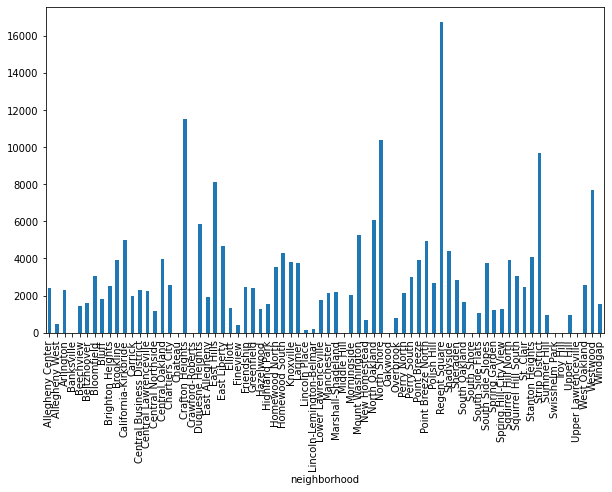

In [28]:
traffic["average_daily_traffic"].plot(figsize=(10,6), kind = "bar" )

In [31]:
traffic = traffic.sort_values(by = "average_daily_traffic")

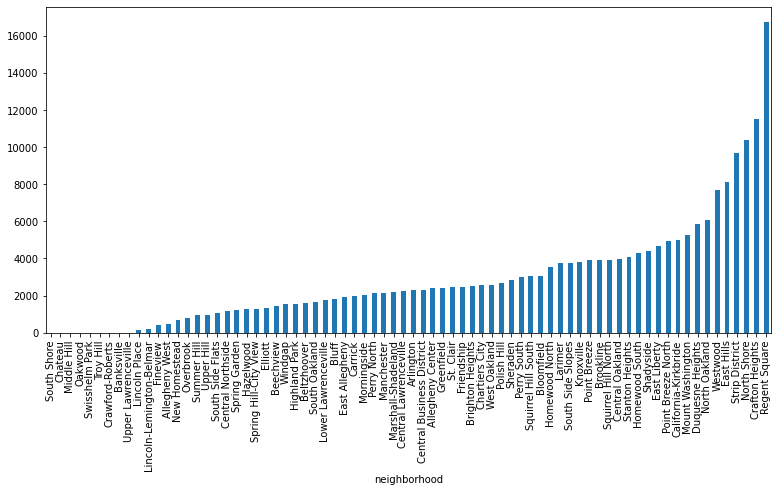

In [34]:
traffic["average_daily_traffic"].plot(figsize=(13,6), kind = "bar" )